In [1]:
# import packages
import pandas as pd
pd.set_option('display.max_columns', None) # Show all columns in the DataFrame
import seaborn as sns
import matplotlib.pyplot as plt

Training Dataset

In [2]:
#dataset
train_data_path = 'Raw_datasets/train.csv'

read dataset in chunks

In [3]:
def read_dataset(train_data_path): 
    chunksize = 500000
    chunks = []
    for chunk in pd.read_csv(train_data_path, chunksize=chunksize, low_memory=False):
        chunks.append(chunk)
    train_data = pd.concat(chunks, ignore_index=True)
    return train_data

optimizing dataset

In [4]:
# Optimizing train_data to reduce memory usage by downcasting numerical col and converting object col to categories since all are int64, float64, object
def optimize_the_dataset(train_data):
    for col in train_data.select_dtypes(include=['int64']).columns:
        train_data[col] = pd.to_numeric(train_data[col],downcast='integer')
    for col in train_data.select_dtypes(include='float64').columns:
        train_data[col] = pd.to_numeric(train_data[col],downcast='float')
    for col in train_data.select_dtypes(include='object').columns:
        train_data[col] = train_data[col].astype('category')
    return train_data

format dataset

In [5]:
# remove trailing spaces and convert records to lowercase for consistency on categorical columns
def format_data(train_data):
    # Convert column names to lower case & remove white spaces
    train_data.columns = train_data.columns.str.lower().str.strip()
    # remove trailing white spaces and make all category to its lowercase
    train_data = train_data.apply(lambda x: x.str.lower().str.strip() if x.dtype == 'category' else x, axis=0)
    return train_data

In [6]:
data = read_dataset(train_data_path) # read dataset
optimize_train_data = optimize_the_dataset(data) # optimize ds for efficiency
train_data = format_data(optimize_train_data) # lowercase it and remove spaces

In [7]:
train_data.head()

,id,orgid,incidentid,alertid,timestamp,detectorid,alerttitle,category,mitretechniques,incidentgrade,actiongrouped,actiongranular,entitytype,evidencerole,deviceid,sha256,ipaddress,url,accountsid,accountupn,accountobjectid,accountname,devicename,networkmessageid,emailclusterid,registrykey,registryvaluename,registryvaluedata,applicationid,applicationname,oauthapplicationid,threatfamily,filename,folderpath,resourceidname,resourcetype,roles,osfamily,osversion,antispamdirection,suspicionlevel,lastverdict,countrycode,state,city
0,180388628218,0,612,123247,2024-06-04t06:05:15.000z,7,6,initialaccess,NaN,truepositive,NaN,NaN,ip,related,98799,138268,27,160396,441377,673934,425863,453297,153085,529644,NaN,1631,635,860,2251,3421,881,NaN,289573,117668,3586,NaN,NaN,5,66,NaN,NaN,NaN,31,6,3
1,455266534868,88,326,210035,2024-06-14t03:01:25.000z,58,43,exfiltration,NaN,falsepositive,NaN,NaN,user,impacted,98799,138268,360606,160396,22406,23032,22795,24887,153085,529644,NaN,1631,635,860,2251,3421,881,NaN,289573,117668,3586,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630
2,1056561957389,809,58352,712507,2024-06-13t04:52:55.000z,423,298,initialaccess,t1189,falsepositive,NaN,NaN,url,related,98799,138268,360606,68652,441377,673934,425863,453297,153085,529644,NaN,1631,635,860,2251,3421,881,NaN,289573,117668,3586,NaN,NaN,5,66,NaN,suspicious,suspicious,242,1445,10630
3,1279900258736,92,32992,774301,2024-06-10t16:39:36.000z,2,2,commandandcontrol,NaN,benignpositive,NaN,NaN,url,related,98799,138268,360606,13,441377,673934,425863,453297,153085,529644,NaN,1631,635,860,2251,3421,881,NaN,289573,117668,3586,NaN,NaN,5,66,NaN,suspicious,suspicious,242,1445,10630
4,214748368522,148,4359,188041,2024-06-15t01:08:07.000z,9,74,execution,NaN,truepositive,NaN,NaN,user,impacted,98799,138268,360606,160396,449,592,440,479,153085,529644,NaN,1631,635,860,2251,3421,881,NaN,289573,117668,3586,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630


check unique value counts

In [8]:
train_data.nunique()

id                    14753
orgid                  1571
incidentid            14497
alertid               20748
timestamp             20582
detectorid             1228
alerttitle             4057
category                 17
mitretechniques         273
incidentgrade             3
actiongrouped             3
actiongranular           10
entitytype               20
evidencerole              2
deviceid                761
sha256                 1065
ipaddress              3860
url                    1263
accountsid             4774
accountupn             7295
accountobjectid        4748
accountname            4994
devicename             1417
networkmessageid       2689
emailclusterid          223
registrykey              19
registryvaluename        10
registryvaluedata        12
applicationid            35
applicationname          47
oauthapplicationid        7
threatfamily            111
filename               1530
folderpath              936
resourceidname           24
resourcetype        

Drop Duplicates

In [9]:
print(train_data['incidentgrade'].isnull().sum())
# Since 'incidentgrade' is our target column, so we need to drop entire rows with null values in this column because imputing it will lead to misleading values
train_data.dropna(subset='incidentgrade', inplace=True)
print("incidentgrade Subset Dropped")

127
incidentgrade Subset Dropped


calculate the null percentage

In [10]:
# null percentage
null_percent = (train_data.isnull().sum() / len(train_data)) * 100
print(null_percent)

id                     0.000000
orgid                  0.000000
incidentid             0.000000
alertid                0.000000
timestamp              0.000000
detectorid             0.000000
alerttitle             0.000000
category               0.000000
mitretechniques       57.488898
incidentgrade          0.000000
actiongrouped         99.964114
actiongranular        99.964114
entitytype             0.000000
evidencerole           0.000000
deviceid               0.000000
sha256                 0.000000
ipaddress              0.000000
url                    0.000000
accountsid             0.000000
accountupn             0.000000
accountobjectid        0.000000
accountname            0.000000
devicename             0.000000
networkmessageid       0.000000
emailclusterid        98.914457
registrykey            0.000000
registryvaluename      0.000000
registryvaluedata      0.000000
applicationid          0.000000
applicationname        0.000000
oauthapplicationid     0.000000
threatfa

drop columns where null > 50%

In [11]:
# drop columns where null percentage is greater than 50%
drop_null_percent_col = null_percent[null_percent > 50].index
train_data = train_data.drop(columns=drop_null_percent_col)

In [12]:
train_data.isnull().sum()

id                    0
orgid                 0
incidentid            0
alertid               0
timestamp             0
detectorid            0
alerttitle            0
category              0
incidentgrade         0
entitytype            0
evidencerole          0
deviceid              0
sha256                0
ipaddress             0
url                   0
accountsid            0
accountupn            0
accountobjectid       0
accountname           0
devicename            0
networkmessageid      0
registrykey           0
registryvaluename     0
registryvaluedata     0
applicationid         0
applicationname       0
oauthapplicationid    0
filename              0
folderpath            0
resourceidname        0
osfamily              0
osversion             0
countrycode           0
state                 0
city                  0
dtype: int64

In [13]:
train_data.head()

,id,orgid,incidentid,alertid,timestamp,detectorid,alerttitle,category,incidentgrade,entitytype,evidencerole,deviceid,sha256,ipaddress,url,accountsid,accountupn,accountobjectid,accountname,devicename,networkmessageid,registrykey,registryvaluename,registryvaluedata,applicationid,applicationname,oauthapplicationid,filename,folderpath,resourceidname,osfamily,osversion,countrycode,state,city
0,180388628218,0,612,123247,2024-06-04t06:05:15.000z,7,6,initialaccess,truepositive,ip,related,98799,138268,27,160396,441377,673934,425863,453297,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,31,6,3
1,455266534868,88,326,210035,2024-06-14t03:01:25.000z,58,43,exfiltration,falsepositive,user,impacted,98799,138268,360606,160396,22406,23032,22795,24887,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630
2,1056561957389,809,58352,712507,2024-06-13t04:52:55.000z,423,298,initialaccess,falsepositive,url,related,98799,138268,360606,68652,441377,673934,425863,453297,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630
3,1279900258736,92,32992,774301,2024-06-10t16:39:36.000z,2,2,commandandcontrol,benignpositive,url,related,98799,138268,360606,13,441377,673934,425863,453297,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630
4,214748368522,148,4359,188041,2024-06-15t01:08:07.000z,9,74,execution,truepositive,user,impacted,98799,138268,360606,160396,449,592,440,479,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630


In [14]:
train_data.columns

Index(['id', 'orgid', 'incidentid', 'alertid', 'timestamp', 'detectorid',
       'alerttitle', 'category', 'incidentgrade', 'entitytype', 'evidencerole',
       'deviceid', 'sha256', 'ipaddress', 'url', 'accountsid', 'accountupn',
       'accountobjectid', 'accountname', 'devicename', 'networkmessageid',
       'registrykey', 'registryvaluename', 'registryvaluedata',
       'applicationid', 'applicationname', 'oauthapplicationid', 'filename',
       'folderpath', 'resourceidname', 'osfamily', 'osversion', 'countrycode',
       'state', 'city'],
      dtype='object')

remove unnecessary columns which wont contribute in model training such as id-colums

In [15]:
# ID columns that won't help in model training
id_columns = ['id', 'orgid', 'accountname','devicename','deviceid', 'sha256', 
               'ipaddress', 'url', 'accountsid', 'accountupn', 'accountobjectid',
               'networkmessageid', 'registrykey', 'registryvaluename', 
               'registryvaluedata', 'applicationid', 'applicationname', 'oauthapplicationid', 
             ]

train_data = train_data.drop(columns=id_columns)

In [16]:
train_data.shape

(22293, 17)

Visualize Target Variable Distribution

In [17]:
# Target variable distribution
train_data['incidentgrade'].value_counts()

incidentgrade
benignpositive    9795
truepositive      7715
falsepositive     4783
Name: count, dtype: int64

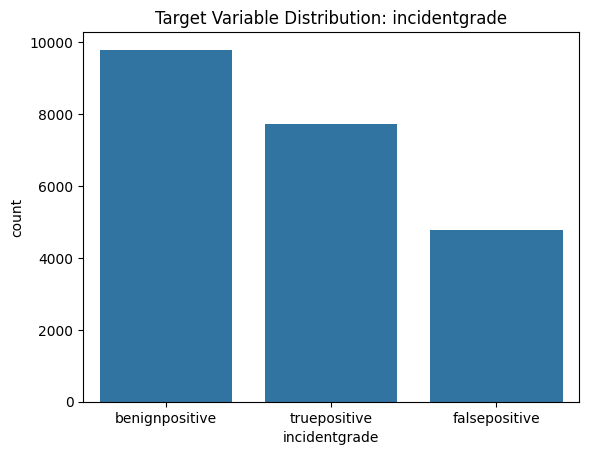

In [18]:
sns.countplot(data=train_data, x='incidentgrade', order=train_data['incidentgrade'].value_counts().index)
plt.title('Target Variable Distribution: incidentgrade')
plt.xlabel('incidentgrade')
plt.ylabel('count')
plt.show()

Feature Engineering

In [19]:
train_data['timestamp'] = pd.to_datetime(train_data['timestamp'])
train_data['year'] = train_data['timestamp'].dt.year
train_data['month'] = train_data['timestamp'].dt.month
train_data['day'] = train_data['timestamp'].dt.day
train_data['hour'] = train_data['timestamp'].dt.hour

# Drop original column
train_data.drop(columns='timestamp',inplace=True)

print(train_data.columns)

Index(['incidentid', 'alertid', 'detectorid', 'alerttitle', 'category',
       'incidentgrade', 'entitytype', 'evidencerole', 'filename', 'folderpath',
       'resourceidname', 'osfamily', 'osversion', 'countrycode', 'state',
       'city', 'year', 'month', 'day', 'hour'],
      dtype='object')


In [20]:
train_data.describe()

,incidentid,alertid,detectorid,alerttitle,filename,folderpath,resourceidname,osfamily,osversion,countrycode,state,city,year,month,day,hour
count,22293.000000,2.229300e+04,22293.000000,22293.000000,22293.000000,22293.000000,22293.000000,22293.000000,22293.000000,22293.000000,22293.000000,22293.000000,22293.000000,22293.000000,22293.000000,22293.000000
mean,69985.685103,4.018458e+05,102.437088,2874.114206,262750.454358,107807.664155,3583.000807,4.898085,64.653524,223.724667,1350.266586,9929.542771,2023.999955,5.909792,9.789216,12.184856
std,119388.551059,4.546488e+05,399.278423,11025.613849,80890.968639,31935.469709,97.635623,0.705660,9.320349,62.761817,353.361415,2617.674340,0.006698,0.295124,6.176927,6.748757
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2023.000000,1.000000,1.000000,0.000000
25%,505.000000,2.377400e+04,2.000000,2.000000,289573.000000,117668.000000,3586.000000,5.000000,66.000000,242.000000,1445.000000,10630.000000,2024.000000,6.000000,5.000000,7.000000
50%,10049.000000,2.142530e+05,9.000000,11.000000,289573.000000,117668.000000,3586.000000,5.000000,66.000000,242.000000,1445.000000,10630.000000,2024.000000,6.000000,9.000000,13.000000
75%,83990.000000,6.626100e+05,44.000000,188.000000,289573.000000,117668.000000,3586.000000,5.000000,66.000000,242.000000,1445.000000,10630.000000,2024.000000,6.000000,13.000000,18.000000
max,599449.000000,1.718609e+06,8983.000000,109424.000000,289573.000000,117668.000000,3586.000000,5.000000,66.000000,242.000000,1445.000000,10630.000000,2024.000000,12.000000,31.000000,23.000000


In [21]:
train_data.head()

,incidentid,alertid,detectorid,alerttitle,category,incidentgrade,entitytype,evidencerole,filename,folderpath,resourceidname,osfamily,osversion,countrycode,state,city,year,month,day,hour
0,612,123247,7,6,initialaccess,truepositive,ip,related,289573,117668,3586,5,66,31,6,3,2024,6,4,6
1,326,210035,58,43,exfiltration,falsepositive,user,impacted,289573,117668,3586,5,66,242,1445,10630,2024,6,14,3
2,58352,712507,423,298,initialaccess,falsepositive,url,related,289573,117668,3586,5,66,242,1445,10630,2024,6,13,4
3,32992,774301,2,2,commandandcontrol,benignpositive,url,related,289573,117668,3586,5,66,242,1445,10630,2024,6,10,16
4,4359,188041,9,74,execution,truepositive,user,impacted,289573,117668,3586,5,66,242,1445,10630,2024,6,15,1


In [22]:
train_data.shape

(22293, 20)

In [23]:
train_data.columns

Index(['incidentid', 'alertid', 'detectorid', 'alerttitle', 'category',
       'incidentgrade', 'entitytype', 'evidencerole', 'filename', 'folderpath',
       'resourceidname', 'osfamily', 'osversion', 'countrycode', 'state',
       'city', 'year', 'month', 'day', 'hour'],
      dtype='object')

In [24]:
train_data.nunique()

incidentid        14378
alertid           20621
detectorid         1181
alerttitle         3974
category             17
incidentgrade         3
entitytype           20
evidencerole          2
filename           1530
folderpath          936
resourceidname       23
osfamily              4
osversion            10
countrycode          79
state               193
city                343
year                  2
month                 6
day                  29
hour                 24
dtype: int64

In [26]:
# Export Datasets
train_data.to_csv(r"Processed_datasets/cleaned_train_data.csv", index=False)

Testing Dataset

In [27]:
#dataset
test_data_path = 'Raw_datasets/test.csv'

In [28]:
data = read_dataset(test_data_path) # read dataset
optimize_test_data = optimize_the_dataset(data) # optimize ds for efficiency
test_data = format_data(optimize_test_data) # lowercase it and remove spaces

In [29]:
test_data.head()

,id,orgid,incidentid,alertid,timestamp,detectorid,alerttitle,category,mitretechniques,incidentgrade,actiongrouped,actiongranular,entitytype,evidencerole,deviceid,sha256,ipaddress,url,accountsid,accountupn,accountobjectid,accountname,devicename,networkmessageid,emailclusterid,registrykey,registryvaluename,registryvaluedata,applicationid,applicationname,oauthapplicationid,threatfamily,filename,folderpath,resourceidname,resourcetype,roles,osfamily,osversion,antispamdirection,suspicionlevel,lastverdict,countrycode,state,city,usage
0,1245540519230,657,11767,87199,2024-06-04t22:56:27.000z,524,563,lateralmovement,t1021;t1047;t1105;t1569.002,benignpositive,NaN,NaN,user,impacted,98799,138268,360606,160396,2610,3699,425863,863,153085,529644,NaN,1631,635,860,2251,3421,881,NaN,289573,117668,3586,NaN,NaN,5,66,NaN,suspicious,suspicious,242,1445,10630,private
1,1400159342154,3,91158,632273,2024-06-03t12:58:26.000z,2,2,commandandcontrol,NaN,benignpositive,NaN,NaN,machine,impacted,1239,138268,360606,160396,441377,673934,425863,453297,2833,529644,NaN,1631,635,860,2251,3421,881,NaN,289573,117668,3586,NaN,NaN,0,0,NaN,suspicious,suspicious,242,1445,10630,public
2,1279900255923,145,32247,131719,2024-06-08t03:20:49.000z,2932,10807,lateralmovement,t1021;t1027.002;t1027.005;t1105,benignpositive,NaN,NaN,process,related,98799,4296,360606,160396,441377,673934,425863,453297,153085,529644,NaN,1631,635,860,2251,3421,881,NaN,14,22,3586,NaN,NaN,5,66,NaN,suspicious,suspicious,242,1445,10630,public
3,60129547292,222,15294,917686,2024-06-12t12:07:31.000z,0,0,initialaccess,t1078;t1078.004,falsepositive,NaN,NaN,cloudlogonsession,related,98799,138268,360606,160396,441377,673934,425863,453297,153085,529644,NaN,1631,635,860,2251,3421,881,NaN,289573,117668,3586,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630,public
4,515396080539,363,7615,5944,2024-06-06t17:42:05.000z,27,18,discovery,t1087;t1087.002,benignpositive,NaN,NaN,user,impacted,98799,138268,360606,160396,133549,673934,425863,136104,153085,529644,NaN,1631,635,860,2251,3421,881,NaN,289573,117668,3586,NaN,suspicious,5,66,NaN,NaN,NaN,242,1445,10630,public


check unique value counts

In [30]:
train_data.nunique()

incidentid        14378
alertid           20621
detectorid         1181
alerttitle         3974
category             17
incidentgrade         3
entitytype           20
evidencerole          2
filename           1530
folderpath          936
resourceidname       23
osfamily              4
osversion            10
countrycode          79
state               193
city                343
year                  2
month                 6
day                  29
hour                 24
dtype: int64

Drop Duplicates

In [31]:
print("Duplicate Entries", test_data.duplicated().sum())
test_data = test_data.drop_duplicates()
print("Duplicate Entries Dropped")

Duplicate Entries 0
Duplicate Entries Dropped


Handling null values

In [32]:
print(test_data['incidentgrade'].isnull().sum())
# Since 'incidentgrade' is our target column, so we need to drop entire rows with null values in this column because imputing it will lead to misleading values
test_data.dropna(subset='incidentgrade', inplace=True)
print("incidentgrade Subset Dropped")

0
incidentgrade Subset Dropped


null percentage

In [33]:
# calculate the null percentage in all columns
null_percent = (test_data.isnull().sum() / len(test_data)) * 100
print(null_percent)

id                     0.000000
orgid                  0.000000
incidentid             0.000000
alertid                0.000000
timestamp              0.000000
detectorid             0.000000
alerttitle             0.000000
category               0.000000
mitretechniques       55.464565
incidentgrade          0.000000
actiongrouped         99.955642
actiongranular        99.955642
entitytype             0.000000
evidencerole           0.000000
deviceid               0.000000
sha256                 0.000000
ipaddress              0.000000
url                    0.000000
accountsid             0.000000
accountupn             0.000000
accountobjectid        0.000000
accountname            0.000000
devicename             0.000000
networkmessageid       0.000000
emailclusterid        99.051421
registrykey            0.000000
registryvaluename      0.000000
registryvaluedata      0.000000
applicationid          0.000000
applicationname        0.000000
oauthapplicationid     0.000000
threatfa

drop columns where null > 50%

In [34]:
# drop columns where null percentage is greater than 50%
drop_null_percent_col = null_percent[null_percent > 50].index
test_data = test_data.drop(columns=drop_null_percent_col)

In [35]:
test_data.isnull().sum()

id                    0
orgid                 0
incidentid            0
alertid               0
timestamp             0
detectorid            0
alerttitle            0
category              0
incidentgrade         0
entitytype            0
evidencerole          0
deviceid              0
sha256                0
ipaddress             0
url                   0
accountsid            0
accountupn            0
accountobjectid       0
accountname           0
devicename            0
networkmessageid      0
registrykey           0
registryvaluename     0
registryvaluedata     0
applicationid         0
applicationname       0
oauthapplicationid    0
filename              0
folderpath            0
resourceidname        0
osfamily              0
osversion             0
countrycode           0
state                 0
city                  0
usage                 0
dtype: int64

remove unnecessary columns which wont contribute in model training such as id-colums

In [36]:
# ID columns that won't help in model training
id_columns = ['id', 'orgid', 'accountname','devicename','deviceid', 'sha256', 
               'ipaddress', 'url', 'accountsid', 'accountupn', 'accountobjectid',
               'networkmessageid', 'registrykey', 'registryvaluename', 
               'registryvaluedata', 'applicationid', 'applicationname', 'oauthapplicationid', 
             ]

test_data = test_data.drop(columns=id_columns)

In [37]:
test_data.shape

(29307, 18)

Visualize Target Variable Distribution

In [38]:
# Target variable distribution
test_data['incidentgrade'].value_counts()

incidentgrade
benignpositive    12369
truepositive      10534
falsepositive      6404
Name: count, dtype: int64

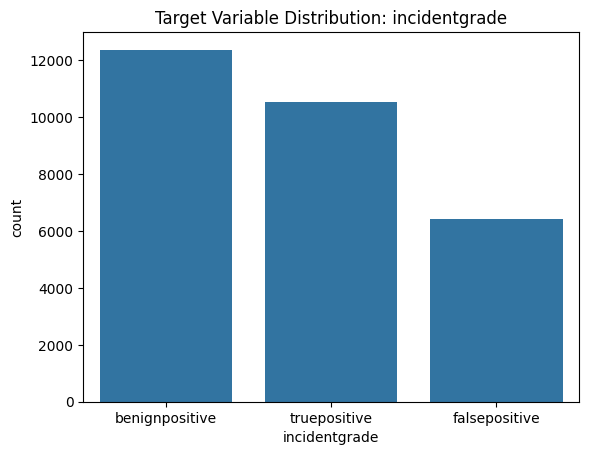

In [39]:
sns.countplot(data=test_data, x='incidentgrade', order=test_data['incidentgrade'].value_counts().index)
plt.title('Target Variable Distribution: incidentgrade')
plt.xlabel('incidentgrade')
plt.ylabel('count')
plt.show()

Feature Engineering

In [41]:
test_data['timestamp'] = pd.to_datetime(test_data['timestamp'])
test_data['year'] = test_data['timestamp'].dt.year
test_data['month'] = test_data['timestamp'].dt.month
test_data['day'] = test_data['timestamp'].dt.day
test_data['hour'] = test_data['timestamp'].dt.hour

In [42]:
# Drop original column
test_data.drop(columns=['timestamp','usage'],inplace=True) #drop usage col because traindata doesnt have it
print(test_data.columns)

Index(['incidentid', 'alertid', 'detectorid', 'alerttitle', 'category',
       'incidentgrade', 'entitytype', 'evidencerole', 'filename', 'folderpath',
       'resourceidname', 'osfamily', 'osversion', 'countrycode', 'state',
       'city', 'year', 'month', 'day', 'hour'],
      dtype='object')


In [43]:
test_data.describe()

,incidentid,alertid,detectorid,alerttitle,filename,folderpath,resourceidname,osfamily,osversion,countrycode,state,city,year,month,day,hour
count,29307.000000,2.930700e+04,29307.000000,29307.000000,29307.000000,29307.000000,29307.000000,29307.000000,29307.000000,29307.000000,29307.000000,29307.000000,29307.0,29307.000000,29307.000000,29307.000000
mean,68973.975091,4.071840e+05,99.304091,2513.413621,261757.830518,107396.017914,3582.816494,4.903163,64.716689,222.221415,1343.926741,9880.161634,2024.0,5.903880,9.733511,12.263111
std,118856.292651,4.536709e+05,398.804231,10415.557630,82354.431420,32625.157004,103.574204,0.687289,9.099514,65.023414,363.861844,2703.390563,0.0,0.300607,6.245765,6.772961
min,3.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2024.0,1.000000,1.000000,0.000000
25%,421.000000,2.320750e+04,2.000000,2.000000,289573.000000,117668.000000,3586.000000,5.000000,66.000000,242.000000,1445.000000,10630.000000,2024.0,6.000000,5.000000,7.000000
50%,9130.000000,2.275810e+05,8.000000,9.000000,289573.000000,117668.000000,3586.000000,5.000000,66.000000,242.000000,1445.000000,10630.000000,2024.0,6.000000,8.000000,13.000000
75%,82239.000000,6.697345e+05,40.000000,114.000000,289573.000000,117668.000000,3586.000000,5.000000,66.000000,242.000000,1445.000000,10630.000000,2024.0,6.000000,13.000000,18.000000
max,597748.000000,1.721001e+06,9425.000000,113027.000000,289573.000000,117668.000000,3586.000000,5.000000,66.000000,242.000000,1445.000000,10630.000000,2024.0,6.000000,31.000000,23.000000


In [44]:
test_data.head()

,incidentid,alertid,detectorid,alerttitle,category,incidentgrade,entitytype,evidencerole,filename,folderpath,resourceidname,osfamily,osversion,countrycode,state,city,year,month,day,hour
0,11767,87199,524,563,lateralmovement,benignpositive,user,impacted,289573,117668,3586,5,66,242,1445,10630,2024,6,4,22
1,91158,632273,2,2,commandandcontrol,benignpositive,machine,impacted,289573,117668,3586,0,0,242,1445,10630,2024,6,3,12
2,32247,131719,2932,10807,lateralmovement,benignpositive,process,related,14,22,3586,5,66,242,1445,10630,2024,6,8,3
3,15294,917686,0,0,initialaccess,falsepositive,cloudlogonsession,related,289573,117668,3586,5,66,242,1445,10630,2024,6,12,12
4,7615,5944,27,18,discovery,benignpositive,user,impacted,289573,117668,3586,5,66,242,1445,10630,2024,6,6,17


In [45]:
test_data.shape

(29307, 20)

In [46]:
test_data.columns

Index(['incidentid', 'alertid', 'detectorid', 'alerttitle', 'category',
       'incidentgrade', 'entitytype', 'evidencerole', 'filename', 'folderpath',
       'resourceidname', 'osfamily', 'osversion', 'countrycode', 'state',
       'city', 'year', 'month', 'day', 'hour'],
      dtype='object')

In [47]:
test_data.nunique()

incidentid        15957
alertid           25284
detectorid         1310
alerttitle         4145
category             18
incidentgrade         3
entitytype           22
evidencerole          2
filename           1963
folderpath         1124
resourceidname       25
osfamily              4
osversion            12
countrycode          84
state               227
city                403
year                  1
month                 5
day                  31
hour                 24
dtype: int64

In [48]:
# Export Datasets
test_data.to_csv(r"Processed_datasets/cleaned_test_data.csv", index=False)
test_data.head()

,incidentid,alertid,detectorid,alerttitle,category,incidentgrade,entitytype,evidencerole,filename,folderpath,resourceidname,osfamily,osversion,countrycode,state,city,year,month,day,hour
0,11767,87199,524,563,lateralmovement,benignpositive,user,impacted,289573,117668,3586,5,66,242,1445,10630,2024,6,4,22
1,91158,632273,2,2,commandandcontrol,benignpositive,machine,impacted,289573,117668,3586,0,0,242,1445,10630,2024,6,3,12
2,32247,131719,2932,10807,lateralmovement,benignpositive,process,related,14,22,3586,5,66,242,1445,10630,2024,6,8,3
3,15294,917686,0,0,initialaccess,falsepositive,cloudlogonsession,related,289573,117668,3586,5,66,242,1445,10630,2024,6,12,12
4,7615,5944,27,18,discovery,benignpositive,user,impacted,289573,117668,3586,5,66,242,1445,10630,2024,6,6,17
